# (Prosper Loan Data Set)
## by (Ahmed Khaled Mohamed)

## Preliminary Wrangling

> It is the prosper loan data set, that contains information about loan listings and related variables including borrower as well as lender information. It contains variables related to Borrower such as credit rating, prosper rating etc. Moreover, the dataset also has lender information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
%matplotlib inline

In [2]:
#load the data 
df = pd.read_csv('prosperLoanData.csv')

### 1.1. Explore the dataset

In [3]:
#explore the data
pd.set_option('display.max_columns', None)
df.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   
5        0.1314       0.1214                  0.11567         0.0449   
6        0.2712       0.2612                  0.23820         0.1275   
7        0.2019       0.1919                  0.17830         0.0799   
8        0.0629       0.0529                  0.05221         0.0099   
9        0.0629       0.0529                  0.05221         0.0099   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   
5          0.07077                      5.0                     B   
6          0.11070                      2.0                     E   
7          0.09840                      4.0                     C   
8          0.04231                      7.0                    AA   
9          0.04231                      7.0                    AA   

   ProsperScore  ListingCategory (numeric) BorrowerState      Occupation  \
0           NaN                          0            CO           Other   
1           7.0                          2            CO    Professional   
2           NaN                          0            GA           Other   
3           9.0                         16            GA   Skilled Labor   
4           4.0                          2            MN       Executive   
5          10.0                          1            NM    Professional   
6           2.0                          1            KS  Sales - Retail   
7           4.0                          2            CA         Laborer   
8           9.0                          7            IL    Food Service   
9          11.0                          7            IL    Food Service   

  EmploymentStatus  EmploymentStatusDura

In [4]:
#get more info. about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#get familiar with data
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

### 1.2. Check for the misleading rows

In [6]:
# check for null values
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

their is no duplicates in the dataframe

### 1.3. Clean the data

In [8]:
# make a copy from the date to clean and work with it
loan = df.copy()

In [9]:
# remove the null values raws in APR
loan = loan[loan['BorrowerAPR'].isnull() == False]
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113912 non-null  object 
 1   ListingNumber                        113912 non-null  int64  
 2   ListingCreationDate                  113912 non-null  object 
 3   CreditGrade                          28928 non-null   object 
 4   Term                                 113912 non-null  int64  
 5   LoanStatus                           113912 non-null  object 
 6   ClosedDate                           55064 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113912 non-null  float64
 9   LenderYield                          113912 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [10]:
# correct the range of DebtToIncomeRatio
loan.DebtToIncomeRatio = loan.DebtToIncomeRatio.abs()
loan = loan.query('DebtToIncomeRatio <= 3')

In [11]:
# correct the ProsperScore 
loan = loan.query('ProsperScore <= 10')

In [12]:
# clean incorrect data in BankcardUtilization
loan = loan.query('BankcardUtilization <= 1')

In [13]:
# drop inefficient coulmns 
loan = loan.drop(['ListingKey','ListingNumber','ListingCreationDate','ClosedDate','GroupKey', 'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines','InquiriesLast6Months', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'LoanKey', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate', 'MemberKey', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount' ],axis=1)

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75446 entries, 1 to 113936
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CreditGrade                          0 non-null      object 
 1   Term                                 75446 non-null  int64  
 2   LoanStatus                           75446 non-null  object 
 3   BorrowerAPR                          75446 non-null  float64
 4   BorrowerRate                         75446 non-null  float64
 5   LenderYield                          75446 non-null  float64
 6   EstimatedEffectiveYield              75446 non-null  float64
 7   EstimatedLoss                        75446 non-null  float64
 8   EstimatedReturn                      75446 non-null  float64
 9   ProsperRating (numeric)              75446 non-null  float64
 10  ProsperRating (Alpha)                75446 non-null  object 
 11  ProsperScore               

### What is the structure of your dataset?

The Prosper loan dataset contains 113,937 observations of 81 variables. The observations refer to loan listings on Prosper.com from late 2005 until 2014, and various characteristics of those loans. The data seems “tidy,” according to Hadley Wickham’s definition: the variable names are not variables themselves, so there is not much work required in the way of “tidying” the data.


### What is/are the main feature(s) of interest in your dataset?

The histogram of Loan Origination Quarter shows a big dip in listings from Q4 2008 into 2009-10. This time period coincides with the (A) collapse of Lehman Brothers and the ensuing fallout in the global financial system, and (B) Prosper’s decision to register with the SEC. It appears that some combination of A and B caused Prosper to change how it does business. It will be interesting to take a look at how Prosper’s business changed over time.

I'm most interested in figureing out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

My main investigation will be into how Prosper’s credit policies and borrower characteristics changed over time as its business model and the larger lending environment evolved. So having the Loan Origination Quarter is critical. And being able to see how much Prosper’s lenders earned or lost on each loan with the Payments, Fees, and Loss fields could prove helpful in illuminating what is going on with these loans.

I expect that the total loan amount will have a negative effect on the APR of the loan: the larger the total loan amount, the lower the APR. I also think that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [15]:
loan.head()

CreditGrade  Term LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  \
1         NaN    36    Current      0.12016        0.0920       0.0820   
3         NaN    36    Current      0.12528        0.0974       0.0874   
4         NaN    36    Current      0.24614        0.2085       0.1985   
5         NaN    60    Current      0.15425        0.1314       0.1214   
6         NaN    36    Current      0.31032        0.2712       0.2612   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
1                  0.07960         0.0249          0.05470   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   
5                  0.11567         0.0449          0.07077   
6                  0.23820         0.1275          0.11070   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
1                      6.0                     A           7.0   
3                      6.0                     A           9.0   
4                      3.0                     D           4.0   
5                      5.0                     B          10.0   
6                      2.0                     E           2.0   

   ListingCategory (numeric) BorrowerState      Occupation EmploymentStatus  \
1                          2            CO    Professional         Employed   
3                         16            GA   Skilled Labor         Employed   
4                          2            MN       Executive         Employed   
5                          1            NM    Professional         Employed   
6                          1            KS  Sales - Retail         Employed   

   EmploymentStatusDuration  IsBorrowerHomeowner  TotalCreditLinespast7years  \
1                      44.0                False                        29.0   
3                     113.0                 True                        29.0   
4                      44.0                 True                        49.0   
5                      82.0                 True                        49.0   
6                     172.0                False                        20.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  TotalInquiries  \
1                     13                        389.0             5.0   
3                      7                        115.0             1.0   
4                      6                        220.0             9.0   
5                     13                       1410.0             2.0   
6                      6                        214.0             0.0   

   CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
1                   0.0               0.0                      0.0   
3                   4.0           10056.0                     14.0   
4                   0.0               0.0                      0.0   
5                   0.0               0.0                      0.0   
6                   0.0               0.0                      0.0   

   PublicRecordsLast10Years  BankcardUtilization  AvailableBankcardCredit  \
1                       1.0                 0.21                  10266.0   
3                       0.0                 0.04                  30754.0   
4                       0.0                 0.81                    695.0   
5                       0.0                 0.39                  86509.0   
6                       0.0                 0.72                   1929.0   

   TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
1         29.0                                1.00                      2.0   
3         26.0                                0.76                      0.0   
4         39.0                                0.95                      2.0   
5         47.0                                1.00                      0.0   
6         16.0                                0.68                      0.0   

   DebtToIncomeRatio     IncomeRa

### 2.1. BorrowerAPR Distribution

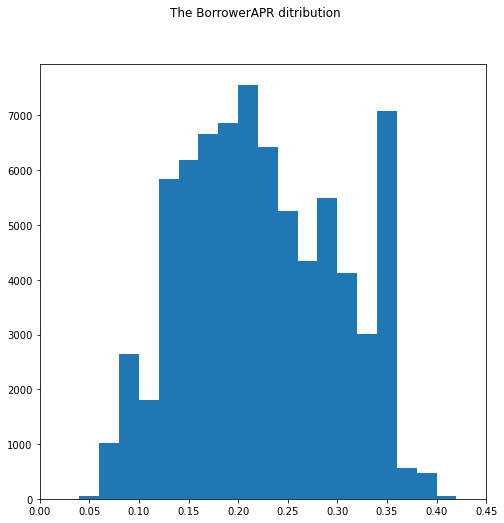

In [16]:
# plotting the BorrowerAPR 
plt.figure(figsize=[8, 8])
plt.suptitle('The BorrowerAPR ditribution');
bins = np.arange(0, loan.BorrowerAPR.max()+0.02,0.02)
plt.hist(data=loan, x='BorrowerAPR', bins=bins);
plt.xlim(0,0.45);

interest rates are pretty high, averaging 19.28%. There are also material spikes at higher interest rates over 30%. Since most of these loans are for debt consolidation, these high rates must still be better than the interest rates the borrowers would have to pay to credit card companies. Or, perhaps the borrowers see value in freeing up the borrowing limit on their credit cards, even if it means paying high rates to Prosper lenders.

### 2.2. Loan Original Amount Distribution

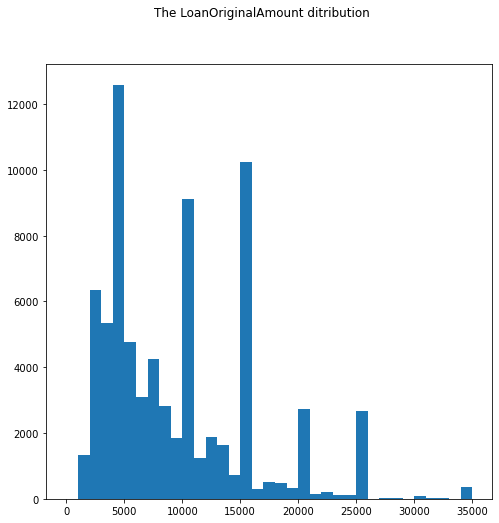

In [17]:
# plotting the LoanOriginalAmount 
plt.figure(figsize=[8, 8])
plt.suptitle('The LoanOriginalAmount ditribution');
bins = np.arange(0, loan.LoanOriginalAmount.max()+1000,1000)
plt.hist(data=loan, x='LoanOriginalAmount', bins=bins);

The loan amounts skew relatively small, with the median of 6,500 less than the mean of 8,337. Based on the past two histograms, a typical loan is for consolidating less than 10,000 of debt (probably credit card debt).

### 2.3. On Time Prosper Payments Distribution

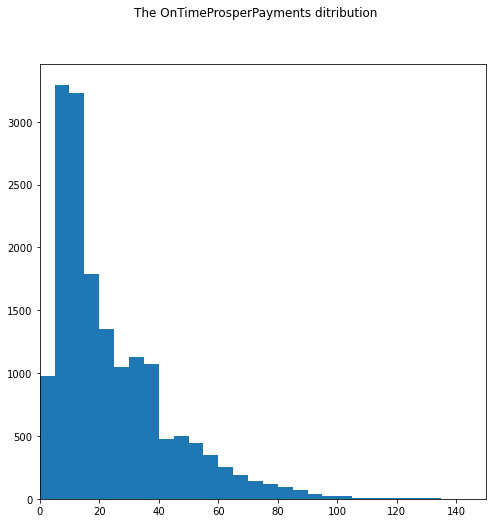

In [18]:
# ploting OnTimeProsperPayments distribution
plt.figure(figsize=[8, 8])
plt.suptitle('The OnTimeProsperPayments ditribution');
bins = np.arange(0, loan.OnTimeProsperPayments.max()+5,5)
plt.hist(data=loan, x='OnTimeProsperPayments', bins=bins);
plt.xlim(0,150);

OnTimeProsperPayments ditribution between 0 to 70.

### 2.4. Monthly Loan Payment Ditribution

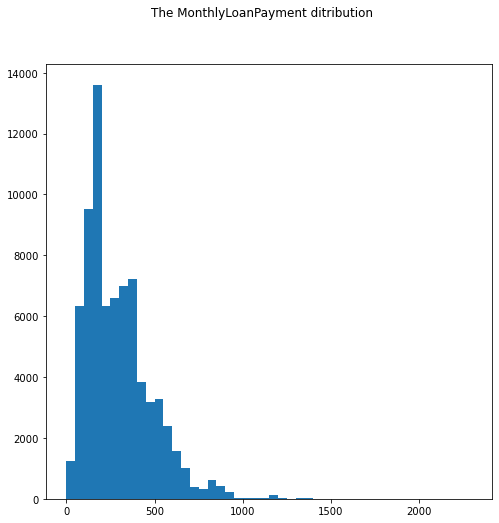

In [19]:
# ploting MonthlyLoanPayment distribution
plt.figure(figsize=[8, 8])
plt.suptitle('The MonthlyLoanPayment ditribution');
bins = np.arange(0, loan.MonthlyLoanPayment.max()+50,50)
plt.hist(data=loan, x='MonthlyLoanPayment', bins=bins);

MonthlyLoanPayment distribution is between 100 to 700, the highest distribution in 200.

### 2.5. Debt To Income Ratio Ditribution

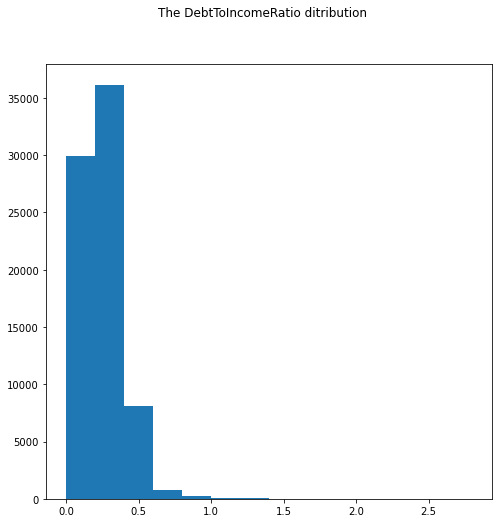

In [20]:
# ploting DebtToIncomeRatio distribution
plt.figure(figsize=[8, 8])
plt.suptitle('The DebtToIncomeRatio ditribution');
bins = np.arange(0, loan.DebtToIncomeRatio.max()+0.2,0.2)
plt.hist(data=loan, x='DebtToIncomeRatio', bins=bins);

The vast majority of Debt-to-Income Ratios are less than 0.5. Excluding the outliers on the high side on the right, the data is close to having the shape of a normal distribution, though it is skewed slightly left.

### 2.6. Loan Origination Quarter Ditribution

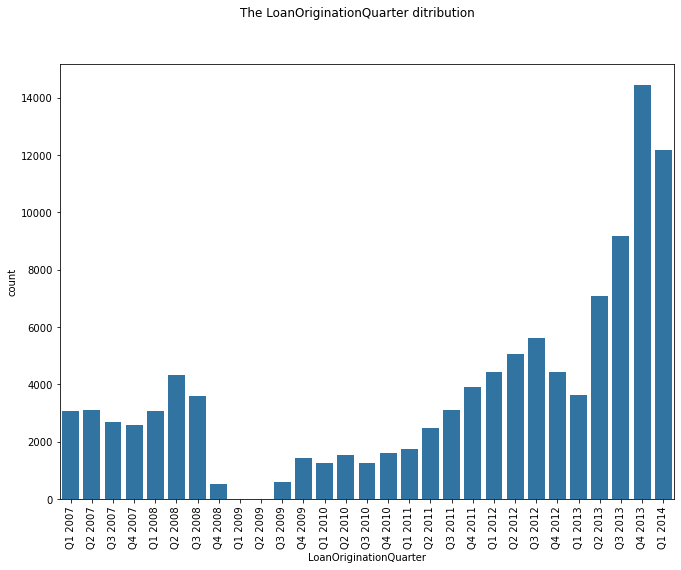

In [21]:
# ploting LoanOriginationQuarter distribution
plt.figure(figsize=[11, 8])
quarter = ['Q1 2007','Q2 2007','Q3 2007','Q4 2007','Q1 2008','Q2 2008','Q3 2008','Q4 2008','Q1 2009','Q2 2009','Q3 2009','Q4 2009','Q1 2010','Q2 2010','Q3 2010','Q4 2010','Q1 2011','Q2 2011','Q3 2011','Q4 2011','Q1 2012','Q2 2012','Q3 2012','Q4 2012','Q1 2013','Q2 2013','Q3 2013','Q4 2013','Q1 2014']
Qcat = pd.api.types.CategoricalDtype(ordered=True, categories=quarter)
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].astype(Qcat)

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'LoanOriginationQuarter', color = default_color)
plt.suptitle('The LoanOriginationQuarter ditribution');
plt.xticks(rotation=90);

This time frame coincides with the collapse of Lehman Brothers and the subsequent fallout in the global financial system from Q4 2008 to 2009. It took almost four years before the listing rate hit the levels of Q2 2008. Although Prosper is an alternative to conventional loan models, its company appears not to have been resistant to the global economic crisis. I'm wondering now if this is an economic crisis? induced Thrive to alter the way it does business. Perhaps, before the financial crisis, Prosper's credit policies were much looser? I'm going to set the issue away for later. It appears, after all, that only in July 2009 did Prosper create its Prosper Rating and Prosper Ranking.

### 2.7. Term Ditribution

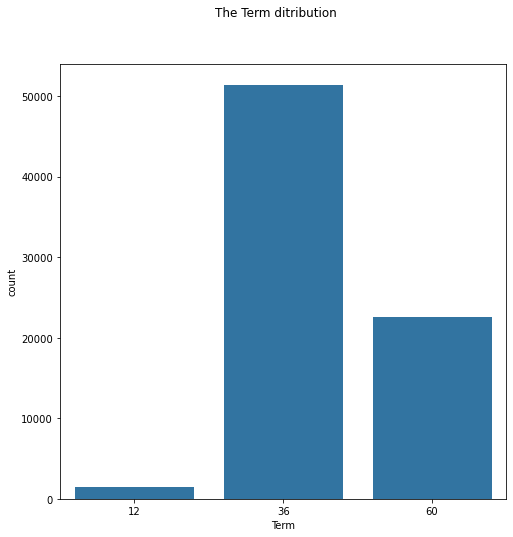

In [22]:
# plotting the Term 
plt.figure(figsize=[8, 8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'Term', color = default_color)
plt.suptitle('The Term ditribution');

Loan terms are either 12, 36, or 60 months, with the vast majority being 36-months.

### 2.8. Credit Grade Ditribution

In [23]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

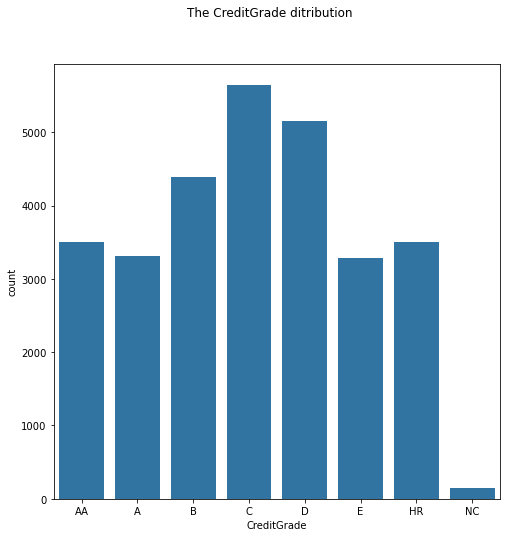

In [24]:
# plotting the CreditGrade 
plt.figure(figsize=[8, 8])
default_color = sb.color_palette()[0]
rquarter = ['AA','A','B','C','D','E','HR','NC']
bcat = pd.api.types.CategoricalDtype(ordered=True, categories=rquarter)
df['CreditGrade'] = df['CreditGrade'].astype(bcat)
sb.countplot(data = df, x = 'CreditGrade', color = default_color)
plt.suptitle('The CreditGrade ditribution');

The most redundent credite grade in the data is C and D and the other nearly same distribution and least category is NC

### 2.9. Loan Status Ditribution

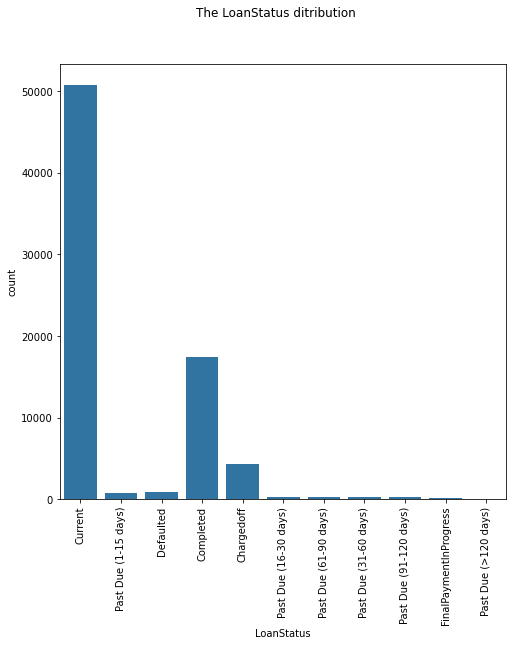

In [25]:
# plotting the LoanStatus 
plt.figure(figsize=[8, 8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'LoanStatus', color = default_color)
plt.suptitle('The LoanStatus ditribution');
plt.xticks(rotation=90);

Overall, it appears that a large majority of loans are either Completed or Current, though there are also a large number of Charged-off and Defaulted (non-performing). A little later I will want to look at loan performance based on origination vintage.

### 2.10. Prosper Score Ditribution

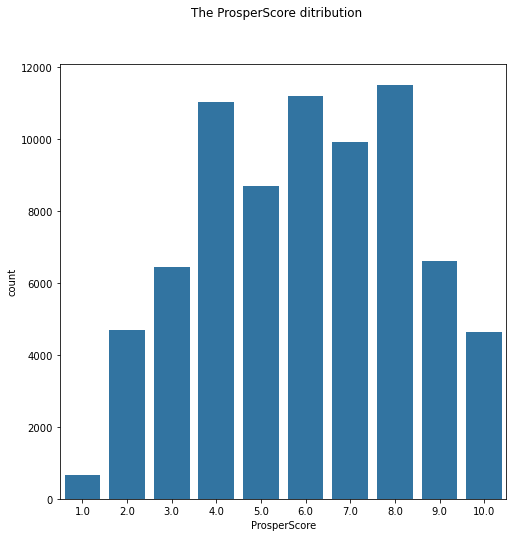

In [26]:
# plotting the ProsperScore 
plt.figure(figsize=[8, 8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'ProsperScore', color = default_color)
plt.suptitle('The ProsperScore ditribution');

This field is more or less normally distributed. We can conclude that, overall, risk ratings are relatively normal across the sample.

### 2.11. Borrower State Ditribution

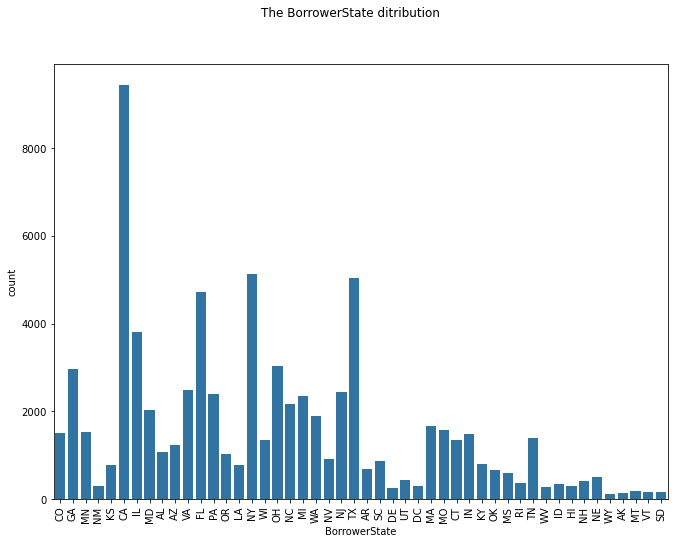

In [27]:
# plotting the BorrowerState 
plt.figure(figsize=[11, 8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'BorrowerState', color = default_color)
plt.suptitle('The BorrowerState ditribution');
plt.xticks(rotation=90);

The most Borrower states is CA.

### 2.12. Income Verifiable Ditribution

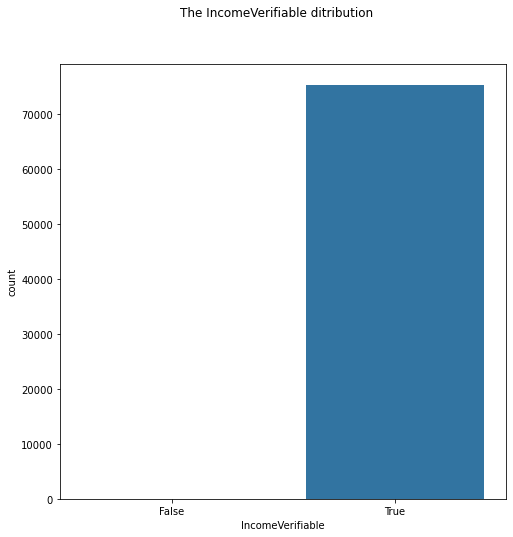

In [28]:
# plotting the IncomeVerifiable 
plt.figure(figsize=[8, 8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'IncomeVerifiable', color = default_color)
plt.suptitle('The IncomeVerifiable ditribution');

Most of IncomeVerifiable is True

### 2.13. Is Borrower Homeowner Ditribution

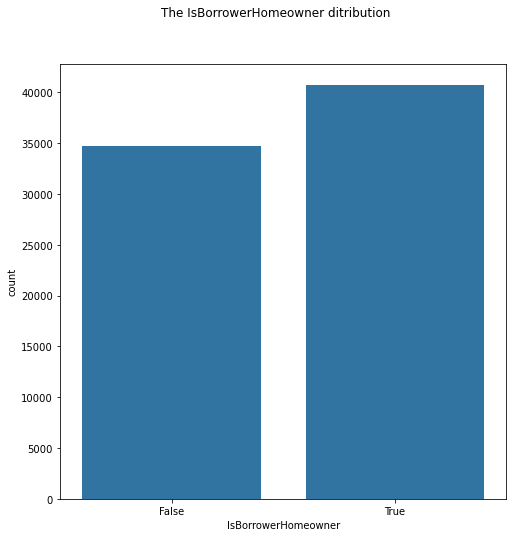

In [29]:
# plotting the IsBorrowerHomeowner 
plt.figure(figsize=[8, 8])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'IsBorrowerHomeowner', color = default_color)
plt.suptitle('The IsBorrowerHomeowner ditribution');

The data is normaly distributed in IsBorrowerHomeowner

### 2.14. Occupation Ditribution

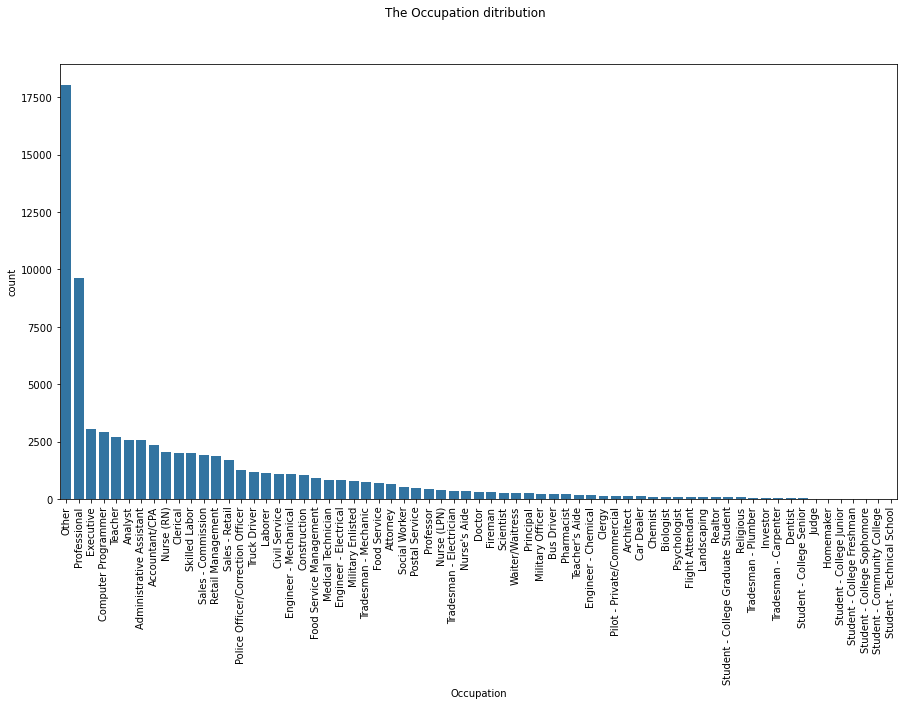

In [30]:
# plotting the Occupation 
plt.figure(figsize=[15, 8])
default_color = sb.color_palette()[0]
freq = loan.Occupation.value_counts().index
sb.countplot(data = loan, x = 'Occupation', color = default_color, order=freq)
plt.suptitle('The Occupation ditribution');
plt.xticks(rotation=90);


he majority put “Other” for their occupation. That is not too helpful. The largest non-Other category is “Professional,” which is also another unhelpful, generic catch-all. But perhaps we can compare the loan performance of some of the other borrower professions down the road.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the brevious analysis I found that:
- The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations. 
- Loan terms are either 12, 36, or 60 months, with the vast majority being 36-months.
- Overall, it appears that a large majority of loans are either Completed or Current, though there are also a large number of Charged-off and Defaulted (non-performing). A little later I will want to look at loan performance based on origination vintage.
- This field is more or less normally distributed. We can conclude that, overall, risk ratings are relatively normal across the sample.
- The most Borrower states is CA.
- Most of IncomeVerifiable is True.
- The data is normaly distributed in IsBorrowerHomeowner.
- majority put “Other” for their occupation. That is not too helpful.
- Prosper ratings are almost normally distributed. 
- Distribution of monthly stated income is very awkward: with a lot of outliers and very large range of values, because this is evidently based on borrowers self-reporting i think there is a lot of wrong values, we will wrangle with it bellow. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions of stated monthly income is highly right screwed. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 100k. Surprisingly, most of borrowers with greater than 100k monthly income only loan less than 5k dollars. So, the very large stated monthly income may be made up. Overall, Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seemed as outlier for the following analysis, so it is better to remove borrower records with income greater than 30k.

The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans (and loans with specified past due period) also chargedoff loans can be considered as defaulted. 

In [31]:
# save the clean data to a .csv file

loan.to_csv('loan_clean.csv', index=False)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### 3.1. BorrowerAPR

#### 3.1.1. BorrowerARP with Borrower credit information

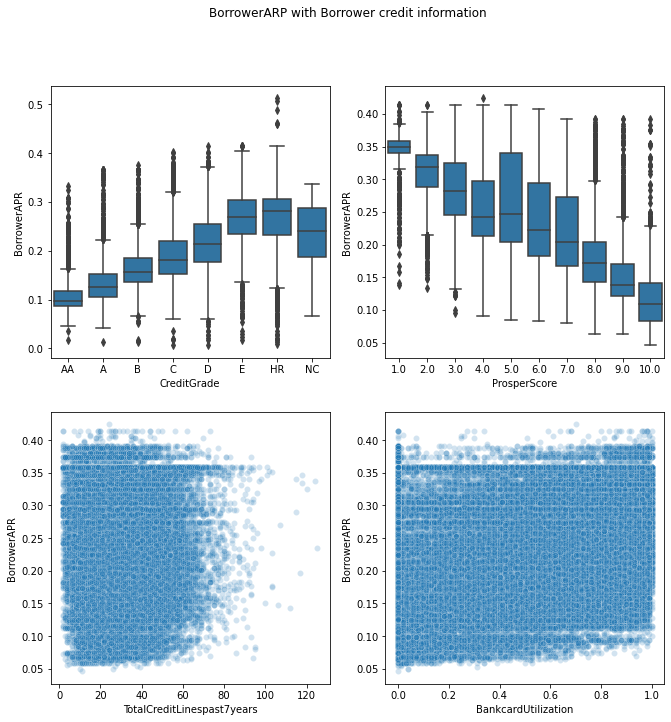

In [32]:
plt.figure(figsize=[11, 11]);
plt.suptitle('BorrowerARP with Borrower credit information');

# BorrowerAPR vs CreditGrade
plt.subplot(2, 2, 1);
base_color =  sb.color_palette()[0]
sb.boxplot(data=df, x='CreditGrade', y='BorrowerAPR', color=base_color);
plt.xlabel('CreditGrade');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs ProsperScore
plt.subplot(2, 2, 2);
sb.boxplot(data=loan, x='ProsperScore', y='BorrowerAPR', color=base_color);
plt.xlabel('ProsperScore');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs TotalCreditLinespast7years
plt.subplot(2, 2, 3);
sb.scatterplot(data=loan, x='TotalCreditLinespast7years', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('TotalCreditLinespast7years');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs BankcardUtilization
plt.subplot(2, 2, 4);
sb.scatterplot(data=loan, x='BankcardUtilization', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('BankcardUtilization');
plt.ylabel('BorrowerAPR');


As the credit grade decreases the Borrower APR increases, and the narrower in distribution decreases. In the prosper score as it increases the Borrower APR decreases.

#### 3.1.2. BorrowerARP with Borrower personal information

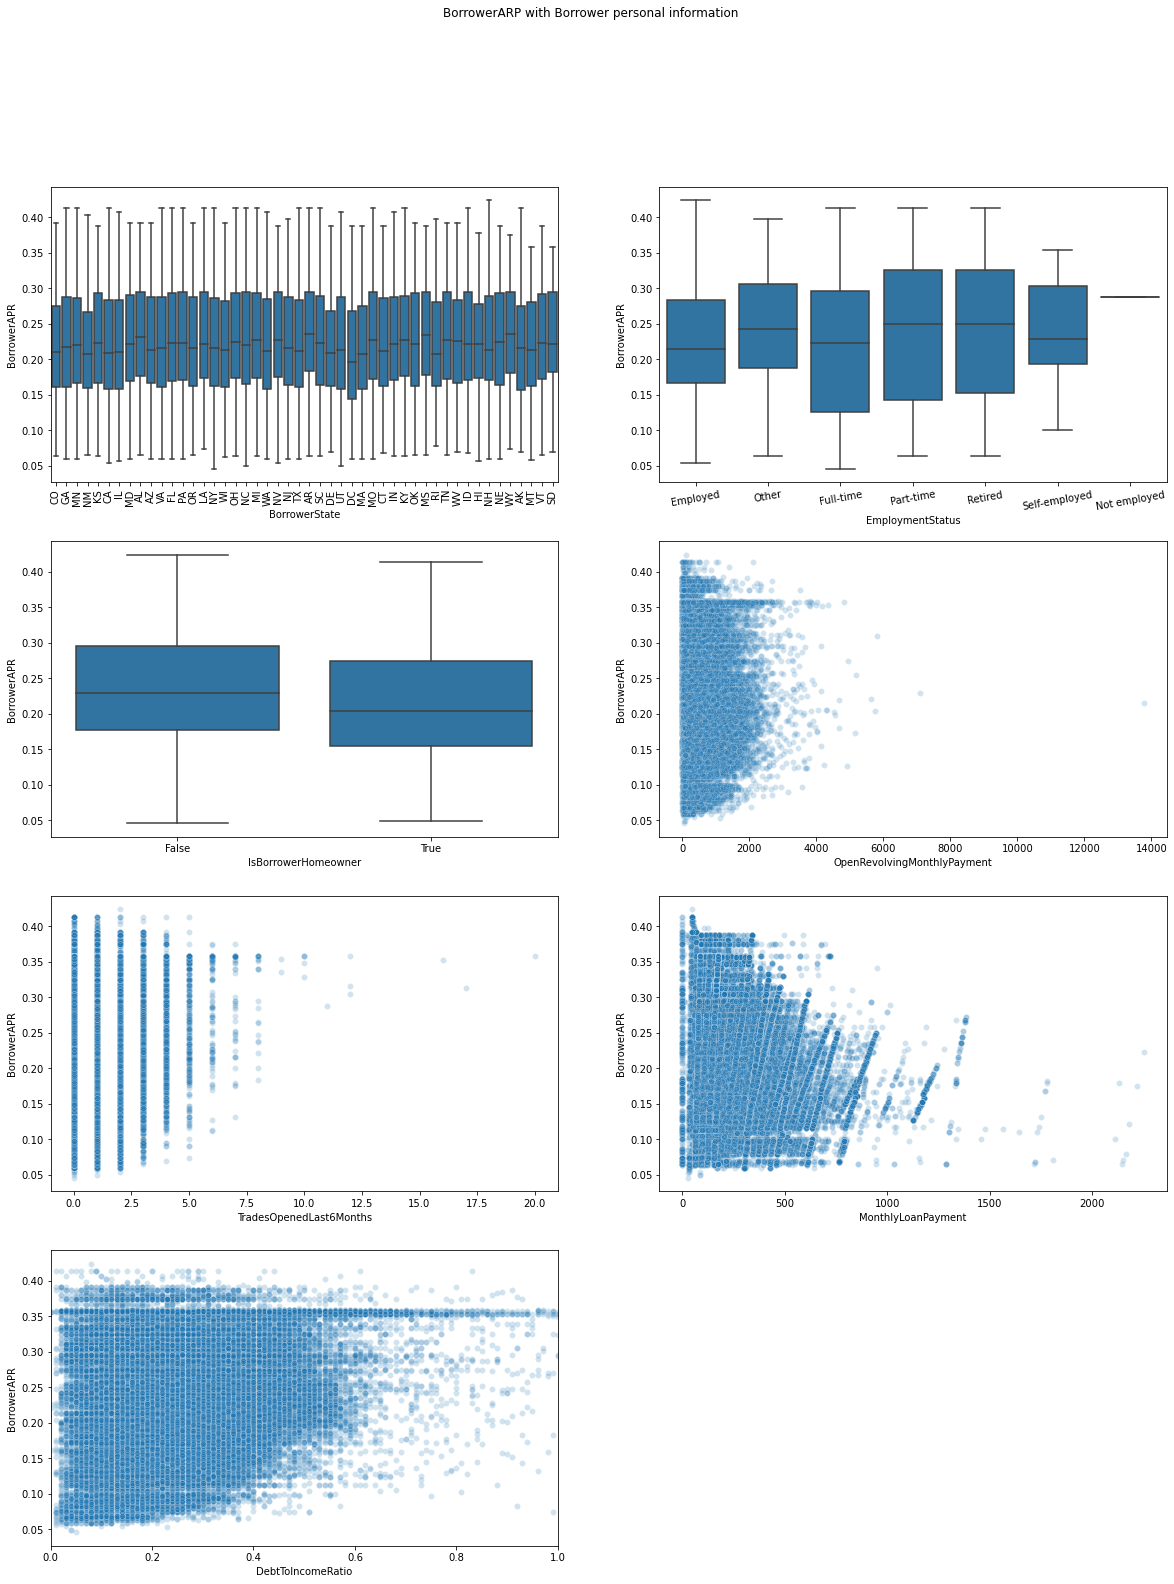

In [33]:
plt.figure(figsize=[20, 25]);
plt.suptitle('BorrowerARP with Borrower personal information');

# BorrowerAPR vs BorrowerState
plt.subplot(4, 2, 1);
base_color =  sb.color_palette()[0]
sb.boxplot(data=loan, x='BorrowerState', y='BorrowerAPR', color=base_color);
plt.xlabel('BorrowerState');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation=90);

# BorrowerAPR vs EmploymentStatus
plt.subplot(4, 2, 2);
base_color =  sb.color_palette()[0]
sb.boxplot(data=loan, x='EmploymentStatus', y='BorrowerAPR', color=base_color);
plt.xlabel('EmploymentStatus');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation=10);

# BorrowerAPR vs IsBorrowerHomeowner
plt.subplot(4, 2, 3);
base_color =  sb.color_palette()[0]
sb.boxplot(data=loan, x='IsBorrowerHomeowner', y='BorrowerAPR', color=base_color);
plt.xlabel('IsBorrowerHomeowner');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs OpenRevolvingMonthlyPayment
plt.subplot(4, 2, 4);
sb.scatterplot(data=loan, x='OpenRevolvingMonthlyPayment', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('OpenRevolvingMonthlyPayment');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs TradesOpenedLast6Months
plt.subplot(4, 2, 5);
sb.scatterplot(data=loan, x='TradesOpenedLast6Months', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('TradesOpenedLast6Months');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs MonthlyLoanPayment
plt.subplot(4, 2, 6);
sb.scatterplot(data=loan, x='MonthlyLoanPayment', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('MonthlyLoanPayment');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs DebtToIncomeRatio
plt.subplot(4, 2, 7);
sb.scatterplot(data=loan, x='DebtToIncomeRatio', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('BorrowerAPR');
plt.xlim(0, 1);


Not quite information in this analysis except the borrower who hasn't have home slitly have a high borrower APR 

#### 3.1.3. BorrowerARP with Borrower records information

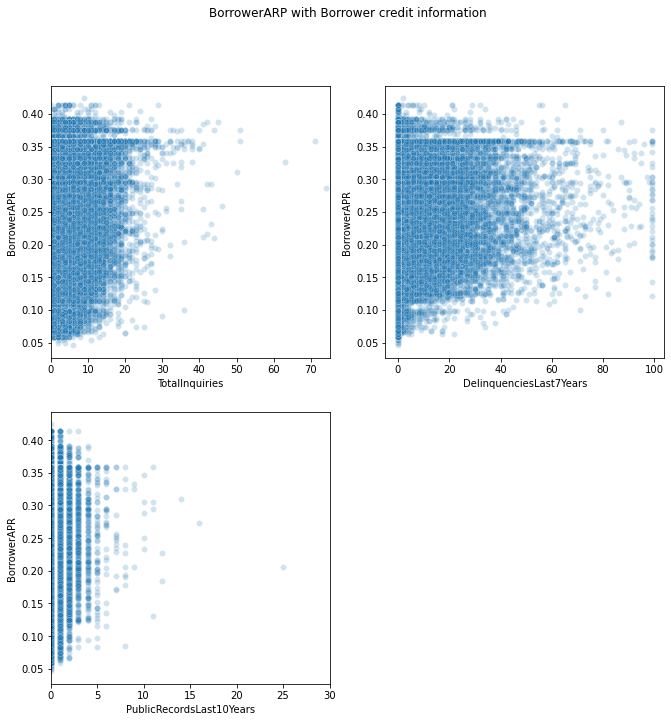

In [34]:
plt.figure(figsize=[11, 11]);
plt.suptitle('BorrowerARP with Borrower credit information');

# BorrowerAPR vs TotalInquiries
plt.subplot(2, 2, 1);
sb.scatterplot(data=loan, x='TotalInquiries', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('TotalInquiries');
plt.ylabel('BorrowerAPR');
plt.xlim(0, 75);

# BorrowerAPR vs DelinquenciesLast7Years
plt.subplot(2, 2, 2);
sb.scatterplot(data=loan, x='DelinquenciesLast7Years', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('DelinquenciesLast7Years');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs PublicRecordsLast10Years
plt.subplot(2, 2, 3);
sb.scatterplot(data=loan, x='PublicRecordsLast10Years', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('PublicRecordsLast10Years');
plt.ylabel('BorrowerAPR');
plt.xlim(0, 30);


As the public records and Delinquencies increases the Borrower APR slitly decreses, but still not an effecient information.

#### 3.1.4. BorrowerARP with lender information

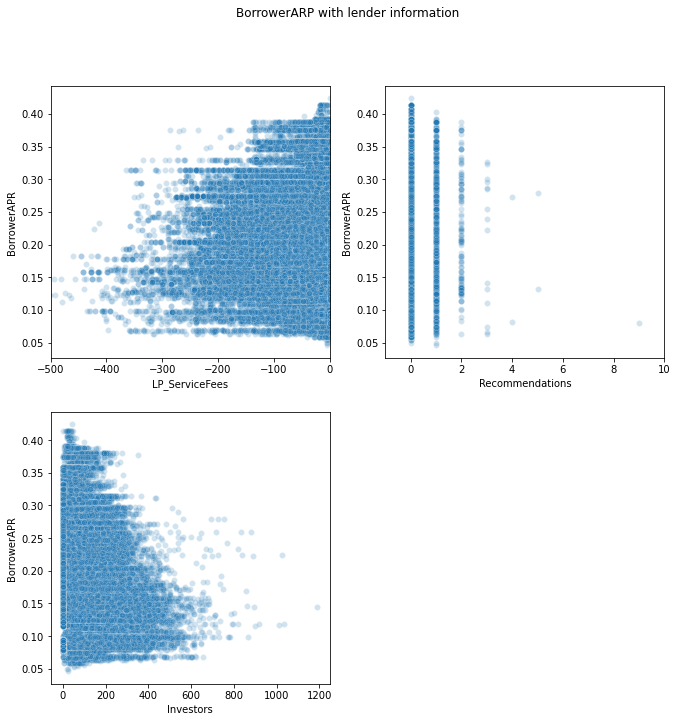

In [35]:
plt.figure(figsize=[11, 11]);
plt.suptitle('BorrowerARP with lender information');

# BorrowerAPR vs LP_ServiceFees
plt.subplot(2, 2, 1);
sb.scatterplot(data=loan, x='LP_ServiceFees', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('LP_ServiceFees');
plt.ylabel('BorrowerAPR');
plt.xlim(-500,0);

# BorrowerAPR vs Recommendations
plt.subplot(2, 2, 2);
sb.scatterplot(data=loan, x='Recommendations', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('Recommendations');
plt.ylabel('BorrowerAPR');
plt.xlim(-1,10)

# BorrowerAPR vs Investors
plt.subplot(2, 2, 3);
sb.scatterplot(data=loan, x='Investors', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('Investors');
plt.ylabel('BorrowerAPR');


As the number of investors increases the Borrower APR decreases.

#### 3.1.5. BorrowerARP with payment information

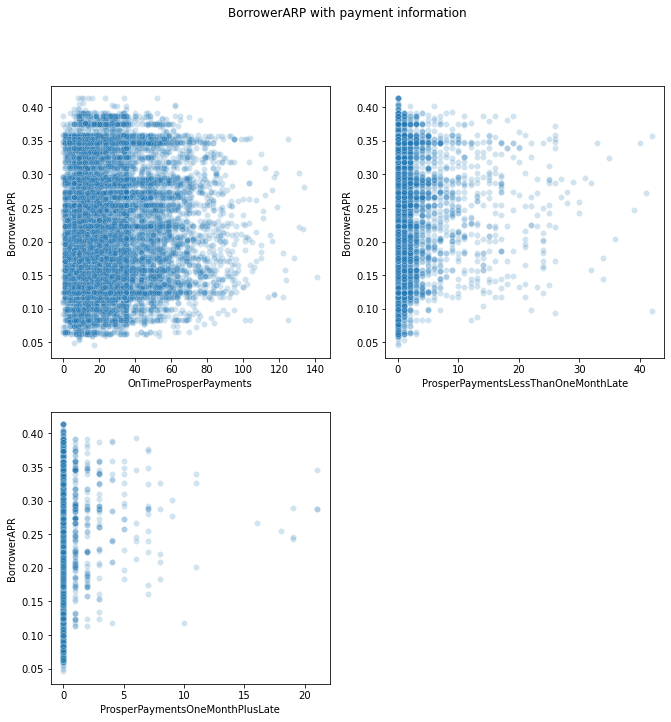

In [36]:
plt.figure(figsize=[11, 11]);
plt.suptitle('BorrowerARP with payment information');

# BorrowerAPR vs OnTimeProsperPayments
plt.subplot(2, 2, 1);
sb.scatterplot(data=loan, x='OnTimeProsperPayments', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('OnTimeProsperPayments');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs ProsperPaymentsLessThanOneMonthLate
plt.subplot(2, 2, 2);
sb.scatterplot(data=loan, x='ProsperPaymentsLessThanOneMonthLate', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('ProsperPaymentsLessThanOneMonthLate');
plt.ylabel('BorrowerAPR');

# BorrowerAPR vs ProsperPaymentsOneMonthPlusLate
plt.subplot(2, 2, 3);
sb.scatterplot(data=loan, x='ProsperPaymentsOneMonthPlusLate', y='BorrowerAPR', alpha= 0.2);
plt.xlabel('ProsperPaymentsOneMonthPlusLate');
plt.ylabel('BorrowerAPR');

There is no additional information in this analysis

### 3.2. ProsperScore 

#### 3.2.1. ProsperScore with Borrower credit information

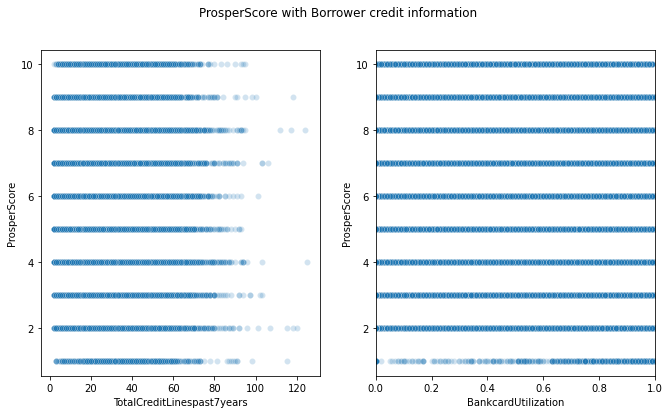

In [37]:
plt.figure(figsize=[11, 6]);
plt.suptitle('ProsperScore with Borrower credit information');

# ProsperScore vs TotalCreditLinespast7years
plt.subplot(1, 2, 1);
sb.scatterplot(data=loan, x='TotalCreditLinespast7years', y='ProsperScore', alpha= 0.2);
plt.xlabel('TotalCreditLinespast7years');
plt.ylabel('ProsperScore');

# ProsperScore vs BankcardUtilization
plt.subplot(1, 2, 2);
sb.scatterplot(data=loan, x='BankcardUtilization', y='ProsperScore', alpha= 0.2);
plt.xlabel('BankcardUtilization');
plt.ylabel('ProsperScore');
plt.xlim(0, 1);

#### 3.2.2. ProsperScore with Borrower personal information

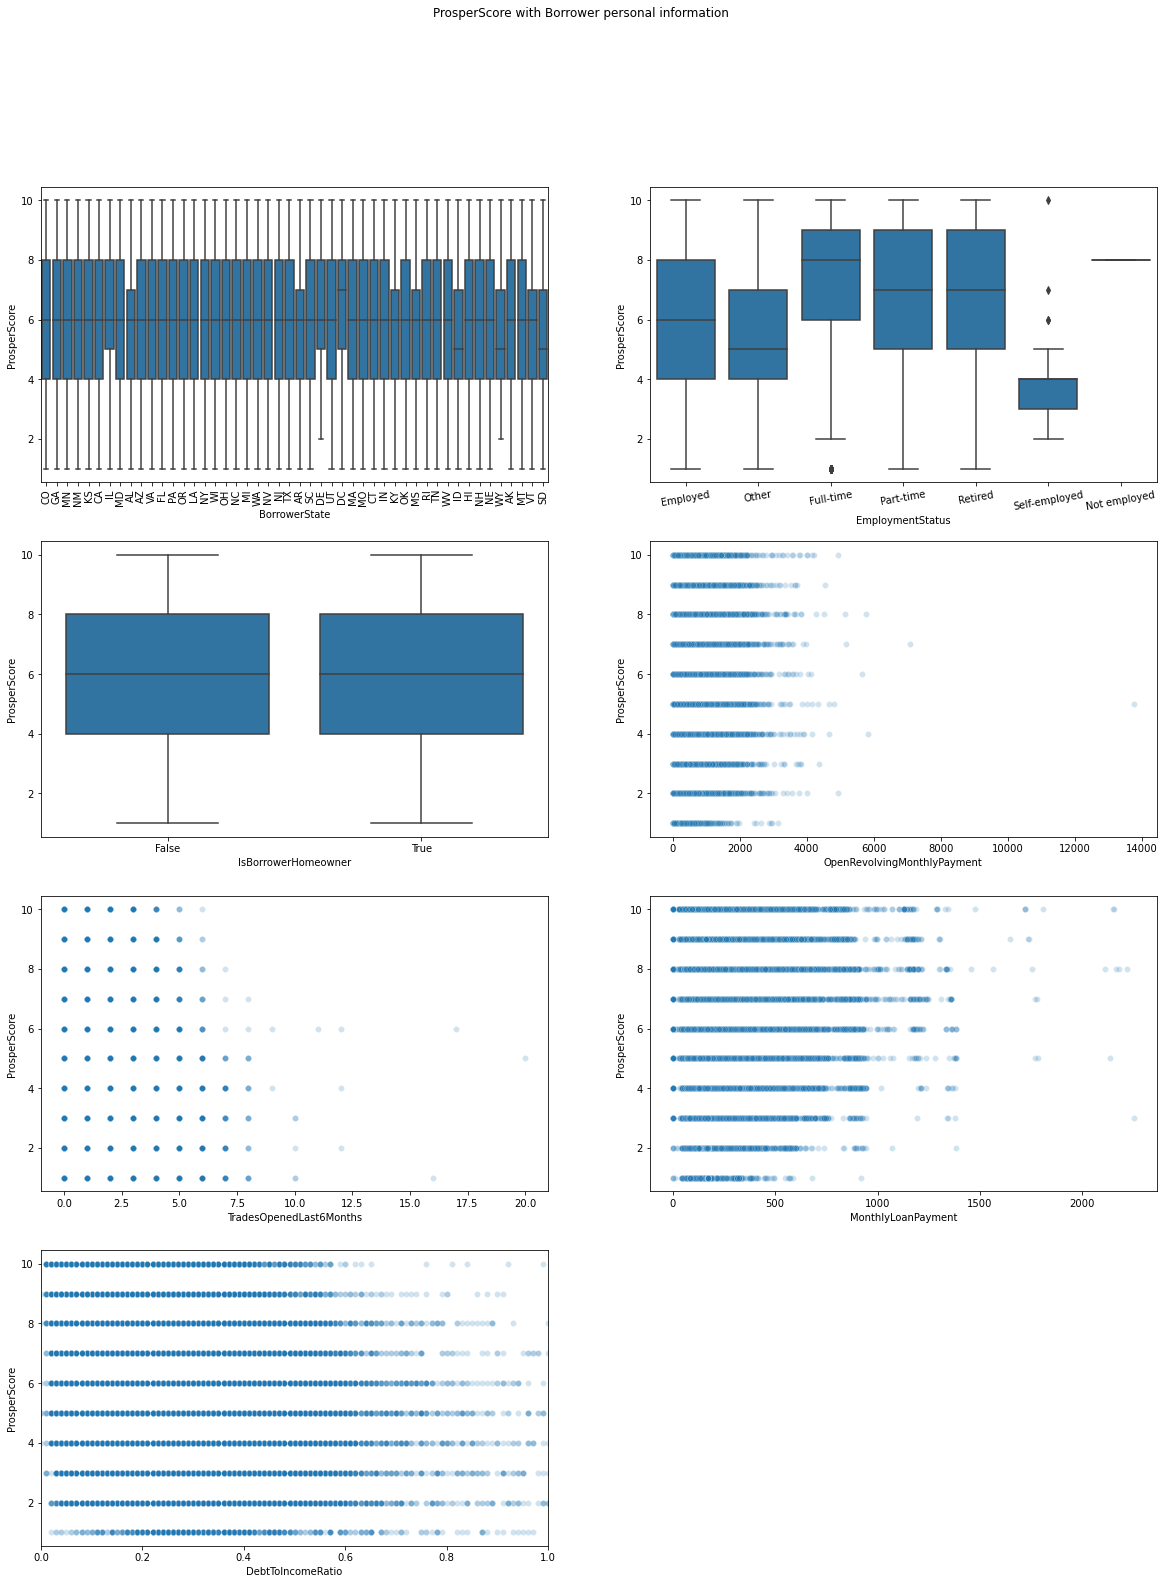

In [38]:
plt.figure(figsize=[20, 25]);
plt.suptitle('ProsperScore with Borrower personal information');

# ProsperScore vs BorrowerState
plt.subplot(4, 2, 1);
base_color =  sb.color_palette()[0]
sb.boxplot(data=loan, x='BorrowerState', y='ProsperScore', color=base_color);
plt.xlabel('BorrowerState');
plt.ylabel('ProsperScore');
plt.xticks(rotation=90);

# ProsperScore vs EmploymentStatus
plt.subplot(4, 2, 2);
base_color =  sb.color_palette()[0]
sb.boxplot(data=loan, x='EmploymentStatus', y='ProsperScore', color=base_color);
plt.xlabel('EmploymentStatus');
plt.ylabel('ProsperScore');
plt.xticks(rotation=10);

# ProsperScore vs IsBorrowerHomeowner
plt.subplot(4, 2, 3);
base_color =  sb.color_palette()[0]
sb.boxplot(data=loan, x='IsBorrowerHomeowner', y='ProsperScore', color=base_color);
plt.xlabel('IsBorrowerHomeowner');
plt.ylabel('ProsperScore')

# ProsperScore vs OpenRevolvingMonthlyPayment
plt.subplot(4, 2, 4);
sb.scatterplot(data=loan, x='OpenRevolvingMonthlyPayment', y='ProsperScore', alpha= 0.2);
plt.xlabel('OpenRevolvingMonthlyPayment');
plt.ylabel('ProsperScore');

# ProsperScore vs TradesOpenedLast6Months
plt.subplot(4, 2, 5);
sb.scatterplot(data=loan, x='TradesOpenedLast6Months', y='ProsperScore', alpha= 0.2);
plt.xlabel('TradesOpenedLast6Months');
plt.ylabel('ProsperScore');

# ProsperScore vs MonthlyLoanPayment
plt.subplot(4, 2, 6);
sb.scatterplot(data=loan, x='MonthlyLoanPayment', y='ProsperScore', alpha= 0.2);
plt.xlabel('MonthlyLoanPayment');
plt.ylabel('ProsperScore');

# ProsperScore vs DebtToIncomeRatio
plt.subplot(4, 2, 7);
sb.scatterplot(data=loan, x='DebtToIncomeRatio', y='ProsperScore', alpha= 0.2);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('ProsperScore');
plt.xlim(0, 1);

#### 3.2.3. ProsperScore with payment information

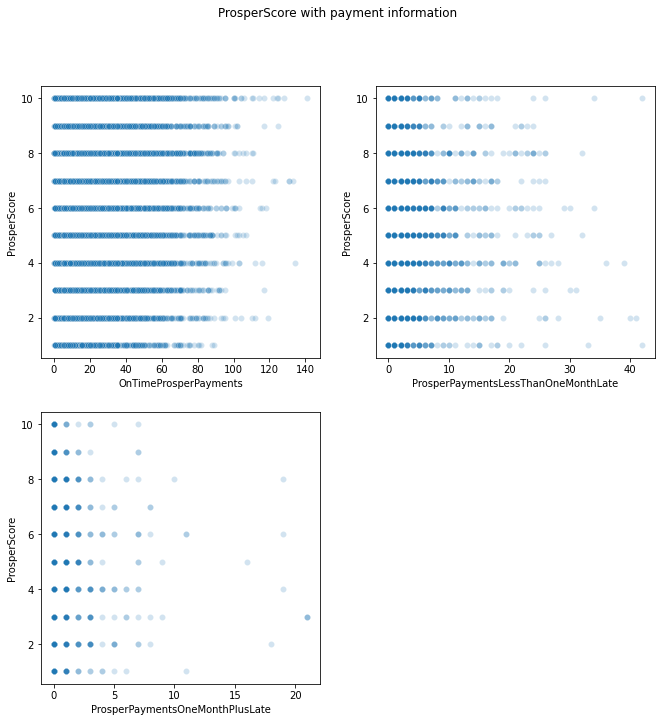

In [39]:
plt.figure(figsize=[11, 11]);
plt.suptitle('ProsperScore with payment information');

# ProsperScore vs OnTimeProsperPayments
plt.subplot(2, 2, 1);
sb.scatterplot(data=loan, x='OnTimeProsperPayments', y='ProsperScore', alpha= 0.2);
plt.xlabel('OnTimeProsperPayments');
plt.ylabel('ProsperScore');

# ProsperScore vs ProsperPaymentsLessThanOneMonthLate
plt.subplot(2, 2, 2);
sb.scatterplot(data=loan, x='ProsperPaymentsLessThanOneMonthLate', y='ProsperScore', alpha= 0.2);
plt.xlabel('ProsperPaymentsLessThanOneMonthLate');
plt.ylabel('ProsperScore');

# ProsperScore vs ProsperPaymentsOneMonthPlusLate
plt.subplot(2, 2, 3);
sb.scatterplot(data=loan, x='ProsperPaymentsOneMonthPlusLate', y='ProsperScore', alpha= 0.2);
plt.xlabel('ProsperPaymentsOneMonthPlusLate');
plt.ylabel('ProsperScore');

### 3.3. Investors

#### 3.3.1. Investors with Borrower credit information

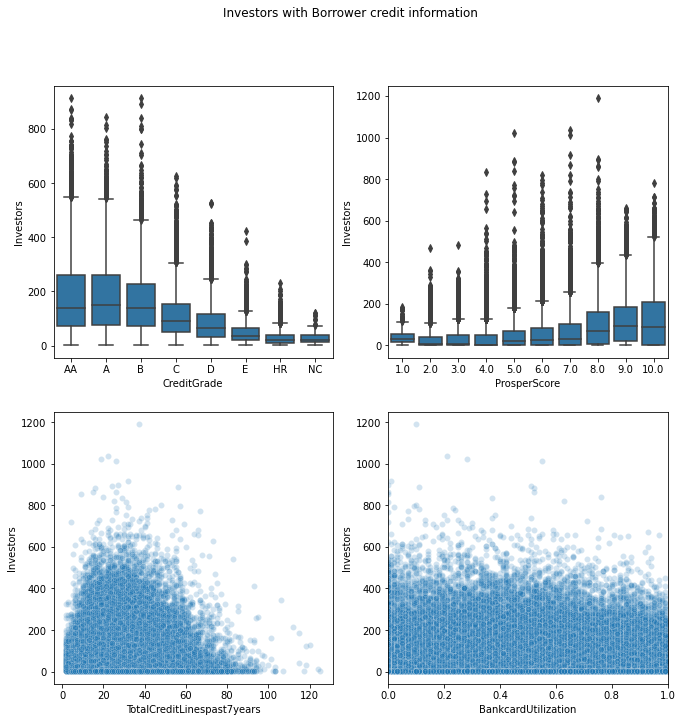

In [40]:
plt.figure(figsize=[11, 11]);
plt.suptitle('Investors with Borrower credit information');

# Investors vs CreditGrade
plt.subplot(2, 2, 1);
base_color =  sb.color_palette()[0]
sb.boxplot(data=df, x='CreditGrade', y='Investors', color=base_color);
plt.xlabel('CreditGrade');
plt.ylabel('Investors');

# Investors vs ProsperScore
plt.subplot(2, 2, 2);
sb.boxplot(data=loan, x='ProsperScore', y='Investors', color=base_color);
plt.xlabel('ProsperScore');
plt.ylabel('Investors');

# Investors vs TotalCreditLinespast7years
plt.subplot(2, 2, 3);
sb.scatterplot(data=loan, x='TotalCreditLinespast7years', y='Investors', alpha= 0.2);
plt.xlabel('TotalCreditLinespast7years');
plt.ylabel('Investors');

# Investors vs BankcardUtilization
plt.subplot(2, 2, 4);
sb.scatterplot(data=loan, x='BankcardUtilization', y='Investors', alpha= 0.2);
plt.xlabel('BankcardUtilization');
plt.ylabel('Investors');
plt.xlim(0, 1);

As decreasing the credite grade the number of investors decreases and increasing the prosper the number of investor increases. 

#### 3.3.2. Investors with Borrower personal information

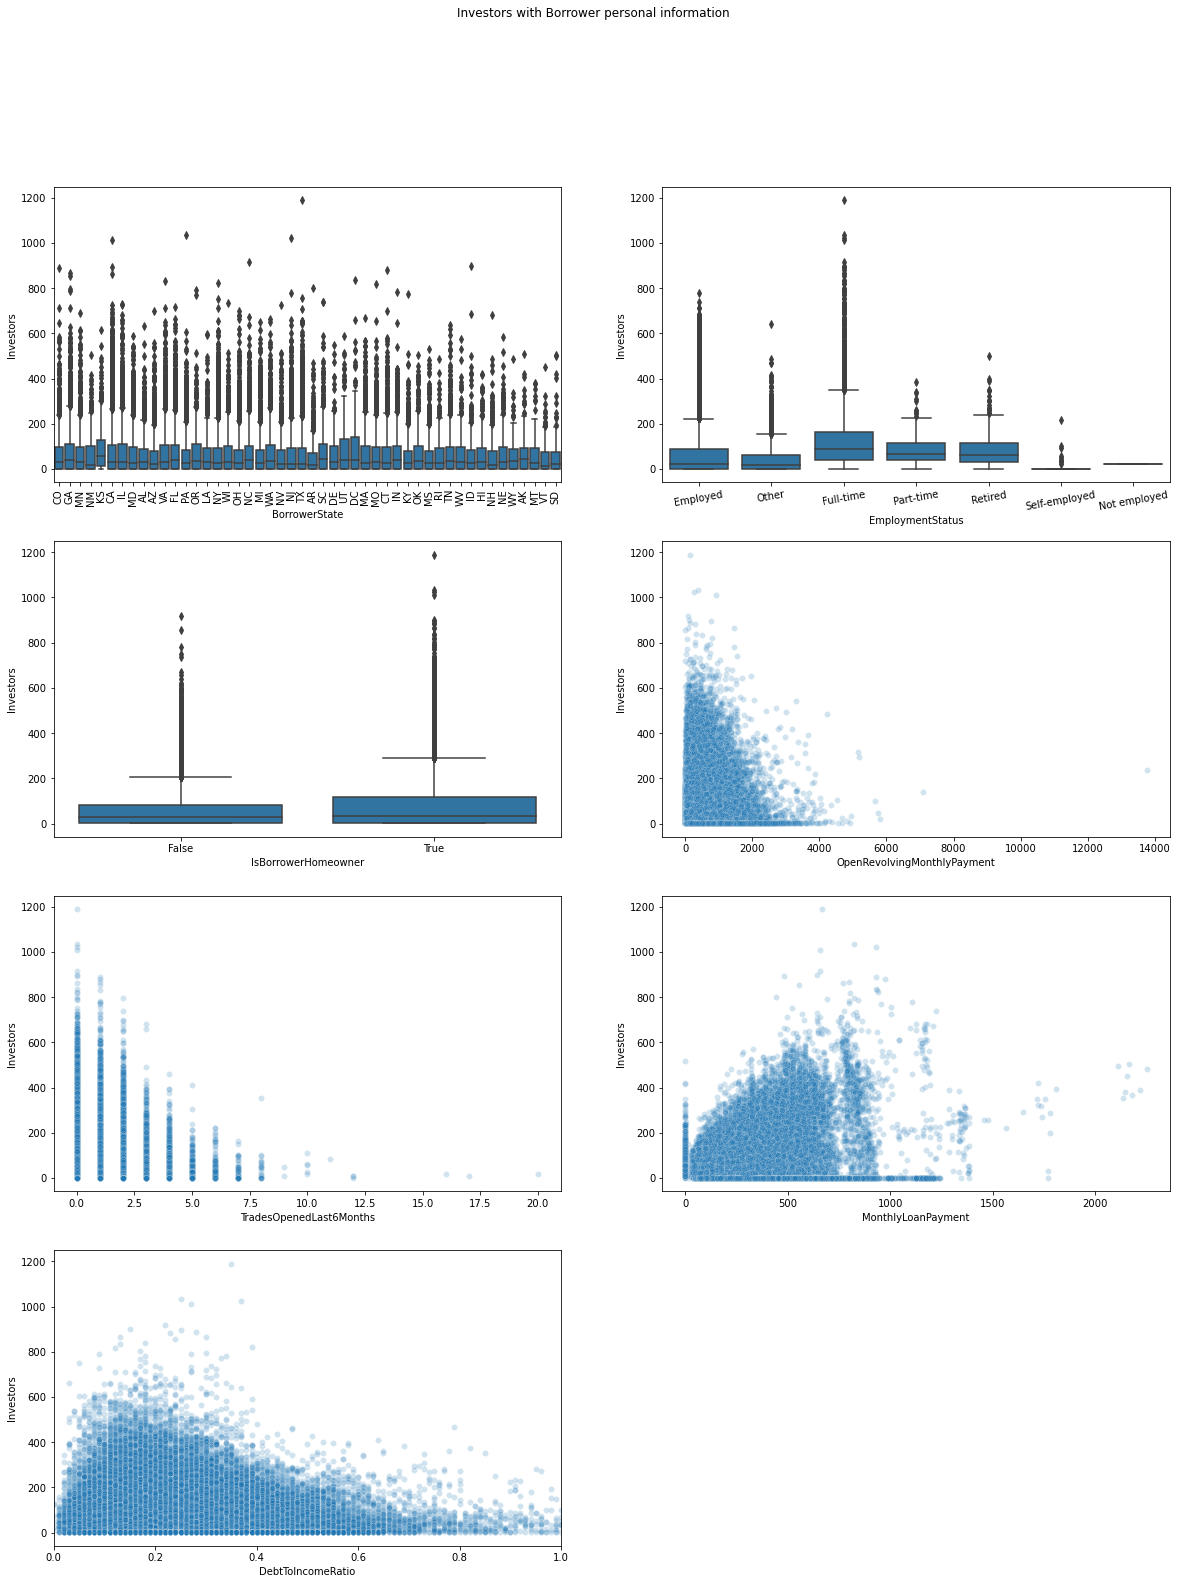

In [41]:
plt.figure(figsize=[20, 25]);
plt.suptitle('Investors with Borrower personal information');

# Investors vs BorrowerState
plt.subplot(4, 2, 1);
base_color =  sb.color_palette()[0]
sb.boxplot(data=loan, x='BorrowerState', y='Investors', color=base_color);
plt.xlabel('BorrowerState');
plt.ylabel('Investors');
plt.xticks(rotation=90);

# Investors vs EmploymentStatus
plt.subplot(4, 2, 2);
base_color =  sb.color_palette()[0]
sb.boxplot(data=loan, x='EmploymentStatus', y='Investors', color=base_color);
plt.xlabel('EmploymentStatus');
plt.ylabel('Investors');
plt.xticks(rotation=10);

# Investors vs IsBorrowerHomeowner
plt.subplot(4, 2, 3);
base_color =  sb.color_palette()[0]
sb.boxplot(data=loan, x='IsBorrowerHomeowner', y='Investors', color=base_color);
plt.xlabel('IsBorrowerHomeowner');
plt.ylabel('Investors')

# Investors vs OpenRevolvingMonthlyPayment
plt.subplot(4, 2, 4);
sb.scatterplot(data=loan, x='OpenRevolvingMonthlyPayment', y='Investors', alpha= 0.2);
plt.xlabel('OpenRevolvingMonthlyPayment');
plt.ylabel('Investors');

# Investors vs TradesOpenedLast6Months
plt.subplot(4, 2, 5);
sb.scatterplot(data=loan, x='TradesOpenedLast6Months', y='Investors', alpha= 0.2);
plt.xlabel('TradesOpenedLast6Months');
plt.ylabel('Investors');

# Investors vs MonthlyLoanPayment
plt.subplot(4, 2, 6);
sb.scatterplot(data=loan, x='MonthlyLoanPayment', y='Investors', alpha= 0.2);
plt.xlabel('MonthlyLoanPayment');
plt.ylabel('Investors');

# Investors vs DebtToIncomeRatio
plt.subplot(4, 2, 7);
sb.scatterplot(data=loan, x='DebtToIncomeRatio', y='Investors', alpha= 0.2);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('Investors');
plt.xlim(0, 1);

the highest investor number in the employment stast full-time and the highest number of investors in the lowest range in dent to income ratio.

#### 3.3.3. Investors with payment information

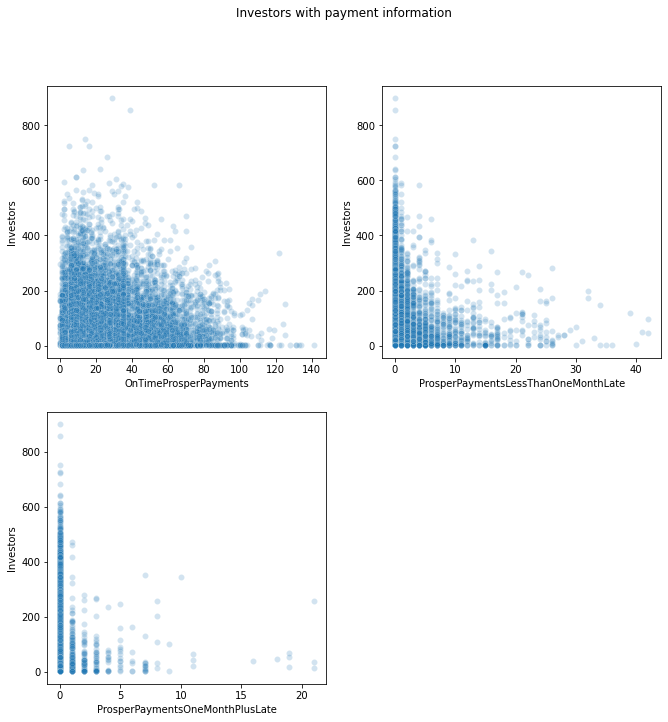

In [42]:
plt.figure(figsize=[11, 11]);
plt.suptitle('Investors with payment information');

# Investors vs OnTimeProsperPayments
plt.subplot(2, 2, 1);
sb.scatterplot(data=loan, x='OnTimeProsperPayments', y='Investors', alpha= 0.2);
plt.xlabel('OnTimeProsperPayments');
plt.ylabel('Investors');

# Investors vs ProsperPaymentsLessThanOneMonthLate
plt.subplot(2, 2, 2);
sb.scatterplot(data=loan, x='ProsperPaymentsLessThanOneMonthLate', y='Investors', alpha= 0.2);
plt.xlabel('ProsperPaymentsLessThanOneMonthLate');
plt.ylabel('Investors');

# Investors vs ProsperPaymentsOneMonthPlusLate
plt.subplot(2, 2, 3);
sb.scatterplot(data=loan, x='ProsperPaymentsOneMonthPlusLate', y='Investors', alpha= 0.2);
plt.xlabel('ProsperPaymentsOneMonthPlusLate');
plt.ylabel('Investors');

the lowest the time in payment the higher the investor numbers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- As expected default credits tend to be given to individuals with lower rating. Business and home improvement seems to be riskier categories. The borrower rate tends to be higher for defaulted credits. Long term (60 months) credits are riskier than short term (12 months). 
- Borrower rate for individuals with low rating is higher. High monthly income corresponds to higher rating. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'. 
- As the credit grade decreases the Borrower APR increases, and the narrower in distribution decreases. In the prosper score as it increases the Borrower APR decreases.
- Investor number depend on the commetment of the borrower and it's highest credet grade and the lowerest risk of propsper score and lowest debt to income ratio.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- interesting thing I've observed is that prosper rating D is the most frequent rating among defaulted credits.
- The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. 
- it also shows that borrowers with better rating also have larger monthly income and loan amount. There is a interaction between prosper rating and term.
- If an occupation has a potentially volatile income stream, it makes that borrower’s loan more risky.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 4.1. payment correlation

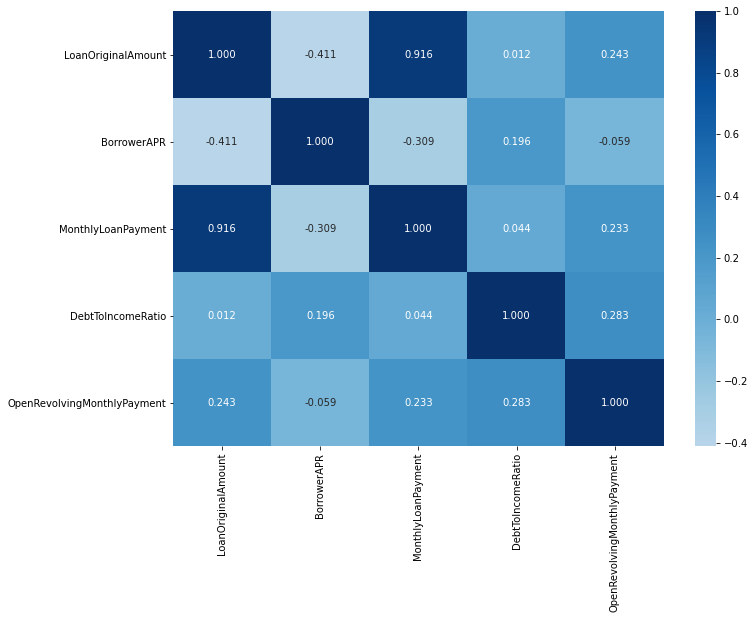

In [43]:
#payment correlation
plt.figure(figsize = [11, 8])
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'MonthlyLoanPayment', 'DebtToIncomeRatio','OpenRevolvingMonthlyPayment']
sb.heatmap(loan[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'Blues', center = 0);

Interestingly there is no strong correlation between variables in this data set. There is some moderate positive and  moderate negative correlation.

### 4.2. BorrowerAPR in terms of loan amount and duration

<Figure size 792x432 with 0 Axes>

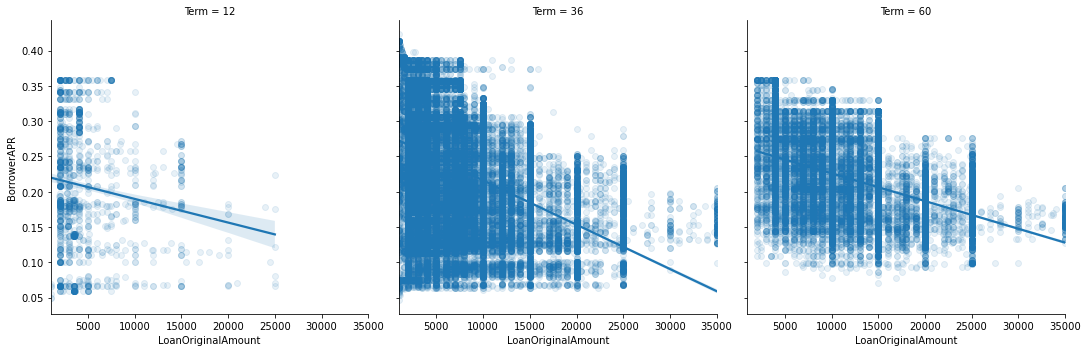

In [44]:
# BorrowerAPR in terms of loan amount and duration
plt.figure(figsize=[11, 6]);
duration=sb.FacetGrid(data=loan, col='Term', height=5, col_wrap=3)
duration.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
duration.add_legend();

Term doesn't seem to have effect on relationship of APR and loan amount

### 4.3. BorrowerAPR in terms of loan amount and duration

<Figure size 792x792 with 0 Axes>

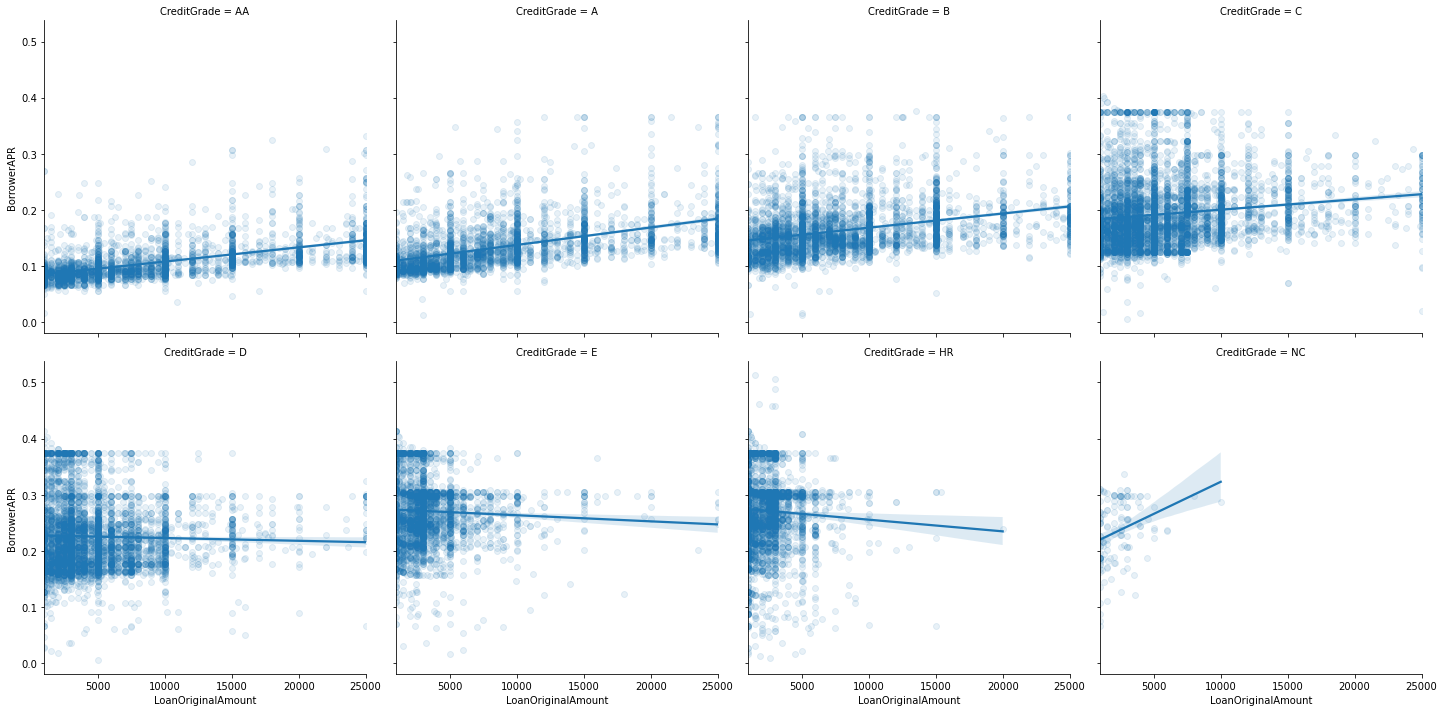

In [45]:
# BorrowerAPR in terms of loan amount and duration
plt.figure(figsize=[11, 11]);
duration=sb.FacetGrid(data=df, col='CreditGrade', height=5, col_wrap=4)
duration.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
duration.add_legend();

The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

### 4.4. ProsperScore by loan duration

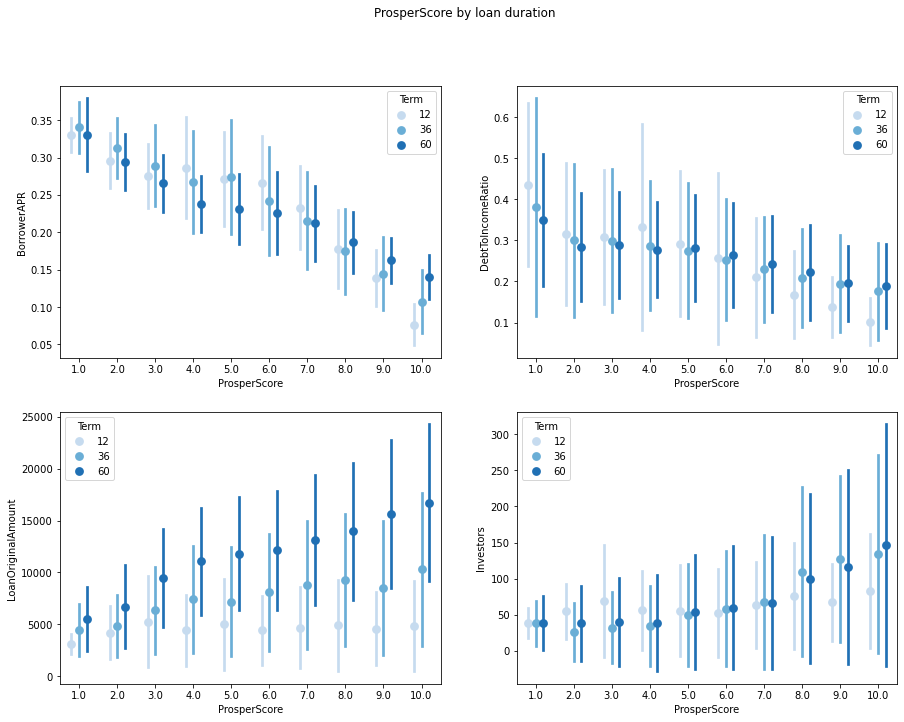

In [46]:
plt.figure(figsize=[15, 11]);
plt.suptitle('ProsperScore by loan duration');

plt.subplot(2, 2, 1);
sb.pointplot(data = loan, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'Term', palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.xlabel('ProsperScore');
plt.ylabel('BorrowerAPR');

plt.subplot(2, 2, 2);
sb.pointplot(data = loan, x = 'ProsperScore', y = 'DebtToIncomeRatio', hue = 'Term', palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.xlabel('ProsperScore');
plt.ylabel('DebtToIncomeRatio');

plt.subplot(2, 2, 3);
sb.pointplot(data = loan, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'Term', palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.xlabel('ProsperScore');
plt.ylabel('LoanOriginalAmount');

plt.subplot(2, 2, 4);
sb.pointplot(data = loan, x = 'ProsperScore', y = 'Investors', hue = 'Term', palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.xlabel('ProsperScore');
plt.ylabel('Investors');


Interestingly, the borrower APR decreases with increasing Prosper rate. But for people with 4.0,7.0 ratings, the APR increase with the decrease of borrow term.
Debt to income ration decreases with increasing the prosper score but nearly the sam in 2.0,3.0,4.0,5.0.
Investor increases with increasing the prosper score.
The loan original amount increases with terms and with prosper score.

### 4.5. Loan Origination Quarter

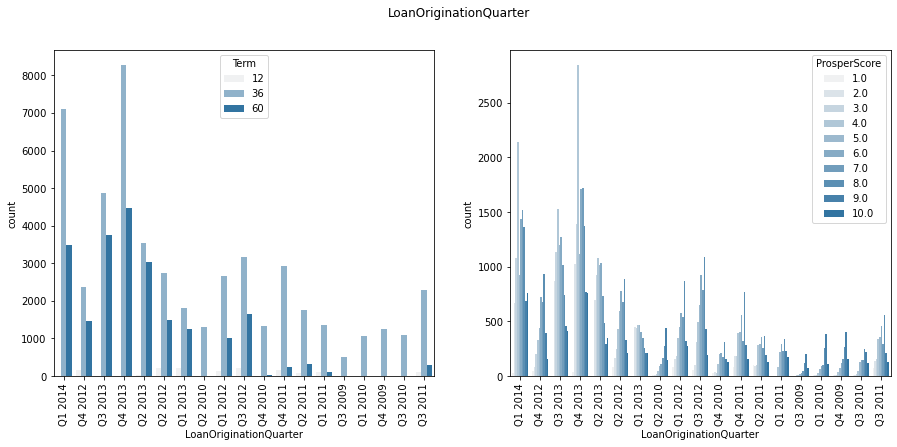

In [47]:
plt.figure(figsize=[15, 6]);
plt.suptitle('LoanOriginationQuarter');

plt.subplot(1, 2, 1);
sb.countplot(data = loan, x = 'LoanOriginationQuarter', hue= 'Term', color = default_color)
plt.xticks(rotation=90);

plt.subplot(1, 2, 2);
sb.countplot(data = loan, x = 'LoanOriginationQuarter', hue= 'ProsperScore', color = default_color)
plt.xticks(rotation=90);


### 4.6. LoanOriginationQuarter  for each  ProsperScore

<Figure size 432x288 with 0 Axes>

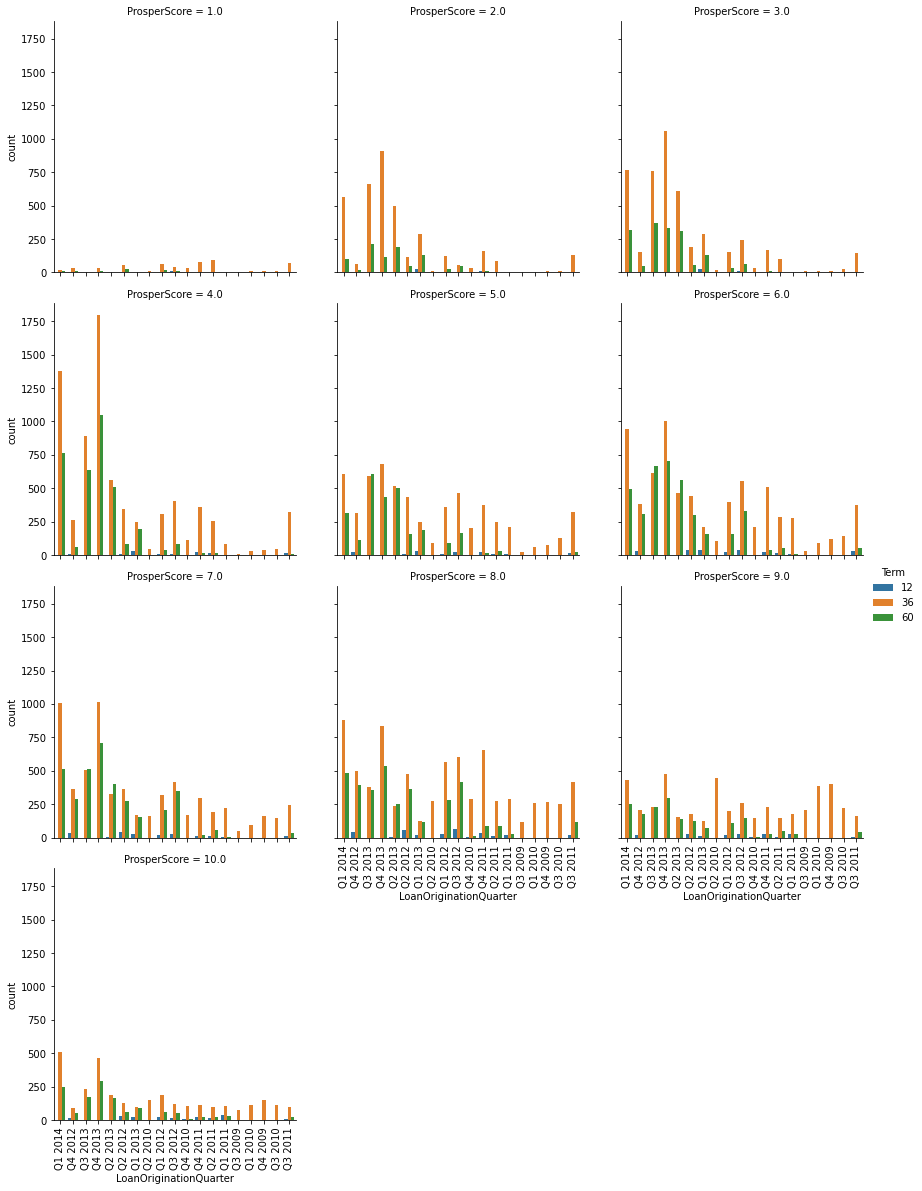

In [48]:
plt.suptitle('LoanOriginationQuarter by loan duration for ProsperScore');
g=sb.catplot(x="LoanOriginationQuarter", hue="Term", col="ProsperScore", data=loan, kind="count", height=4, col_wrap=3);
g.set_xticklabels(rotation=90);

The Loan original quarter increases with moving forward in years and increases it's duration.
The higher prosper score is nearly vanished in earlyer years from 2009 to 2011.

### 4.7. BorrowerAPR and  EmploymentStatus for loan terms 

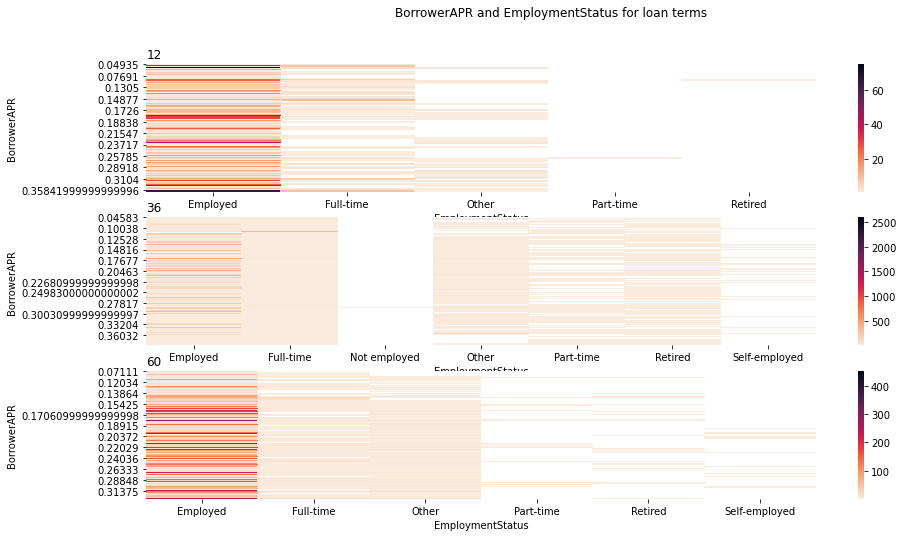

In [49]:
plt.figure(figsize=[15, 8]);
plt.suptitle('BorrowerAPR and EmploymentStatus for loan terms');

# BorrowerAPR and EmploymentStatus for loan 12 months duration 
plt.subplot(3, 1, 1)
duration = loan.query('Term == 12')
s = duration.groupby(['BorrowerAPR', 'EmploymentStatus']).size()
s = s.reset_index(name='count')
s = s.pivot(index='BorrowerAPR', columns='EmploymentStatus', values='count')
sb.heatmap(s, cmap='rocket_r');
plt.title('12', loc='left');
plt.xlabel('EmploymentStatus');
plt.ylabel('BorrowerAPR');

# BorrowerAPR and EmploymentStatus for loan 36 months duration 
plt.subplot(3, 1, 2)

duration = loan.query('Term == 36')
s = duration.groupby(['BorrowerAPR', 'EmploymentStatus']).size()
s = s.reset_index(name='count')
s = s.pivot(index='BorrowerAPR', columns='EmploymentStatus', values='count')
sb.heatmap(s, cmap='rocket_r');
plt.title('36', loc='left');
plt.xlabel('EmploymentStatus');
plt.ylabel('BorrowerAPR');
# BorrowerAPR and EmploymentStatus for loan 60 months duration 
plt.subplot(3, 1, 3)

duration = loan.query('Term == 60')
s = duration.groupby(['BorrowerAPR', 'EmploymentStatus']).size()
s = s.reset_index(name='count')
s = s.pivot(index='BorrowerAPR', columns='EmploymentStatus', values='count')
sb.heatmap(s, cmap='rocket_r');
plt.title('60', loc='left');
plt.xlabel('EmploymentStatus');
plt.ylabel('BorrowerAPR');

The most distributed data in whole loan term is employed status followed by full time status.

### 4.8. ProsperScore and  EmploymentStatus

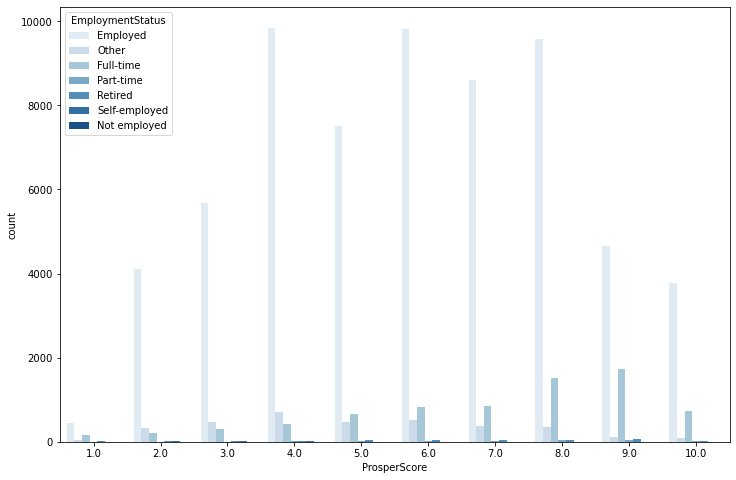

In [50]:
plt.figure(figsize = [12, 8])
sb.countplot(data = loan, x = 'ProsperScore', hue = 'EmploymentStatus', palette='Blues');

middle ratings seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time.

### 4.9. BorrowerAPR and ProsperRating for loan status

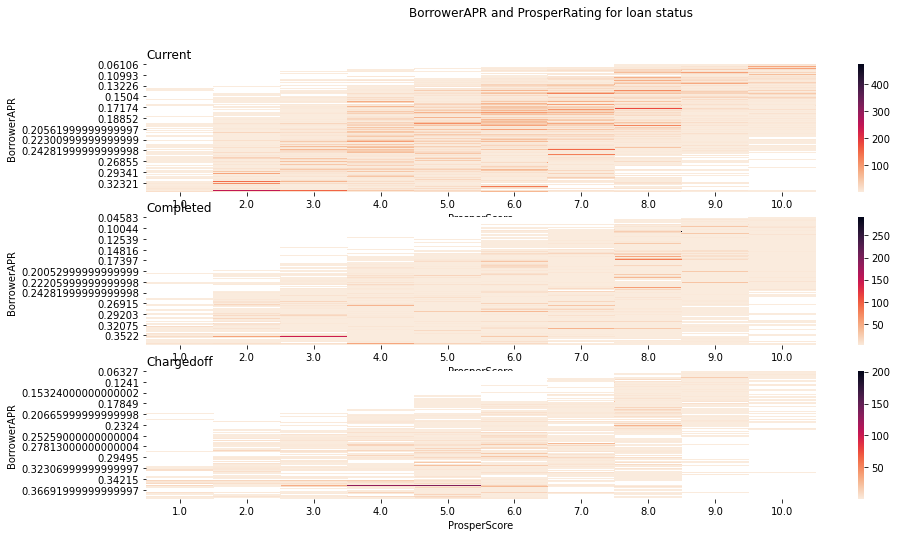

In [51]:
plt.figure(figsize=[15, 8]);
plt.suptitle('BorrowerAPR and ProsperRating for loan status');

# BorrowerAPR and ProsperRating for loan Current 
plt.subplot(3, 1, 1)
duration = loan.query('LoanStatus == "Current"')
s = duration.groupby(['BorrowerAPR', 'ProsperScore']).size()
s = s.reset_index(name='count')
s = s.pivot(index='BorrowerAPR', columns='ProsperScore', values='count')
sb.heatmap(s, cmap='rocket_r');
plt.title('Current', loc='left');
plt.xlabel('ProsperScore');
plt.ylabel('BorrowerAPR');

# BorrowerAPR and ProsperRating for loan Completed
plt.subplot(3, 1, 2)

duration = loan.query('LoanStatus == "Completed"')
s = duration.groupby(['BorrowerAPR', 'ProsperScore']).size()
s = s.reset_index(name='count')
s = s.pivot(index='BorrowerAPR', columns='ProsperScore', values='count')
sb.heatmap(s, cmap='rocket_r');
plt.title('Completed', loc='left');
plt.xlabel('ProsperScore');
plt.ylabel('BorrowerAPR');
# BorrowerAPR and ProsperRating for loan Chargedoff 
plt.subplot(3, 1, 3)

duration = loan.query('LoanStatus == "Chargedoff"')
s = duration.groupby(['BorrowerAPR', 'ProsperScore']).size()
s = s.reset_index(name='count')
s = s.pivot(index='BorrowerAPR', columns='ProsperScore', values='count')
sb.heatmap(s, cmap='rocket_r');
plt.title('Chargedoff', loc='left');
plt.xlabel('ProsperScore');
plt.ylabel('BorrowerAPR');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Our initial assumptions were strengthened. The outcome of credit depends on Prosper raing, Term, Employment status. Defaulted credits tend to be larger than completed for all ratings except the lowest ones. In terms of purposes of credits more default prone are other and business categories (business category also tend to have larger loans). Long term (60 months) loans are riskier than mid-term and short term.

I extended my investigation of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Were there any interesting or surprising interactions between features?

A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. 

Interesting find was that defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits. Another interesting find that individuals with lowerst rating (HR) have only mid-term (36 months) credits

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!